# Probability 

In [1]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
plt.rcParams.update({'font.size': 16}) 
import scipy.stats as stats
import statsmodels.api as sm 
import savingfigR as sf


Bad key font.name in file /Users/duncan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/SCARRLab.mplstyle, line 4 ('font.name : times-new-roman')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution


## Sampling from a Normal Distribution (N=5)

In [2]:
norm0 = np.random.normal(loc=10, scale=2, size=(5,))
print(norm0)

[ 8.18049876  6.28419235 12.2865738   8.61799149  7.21837575]


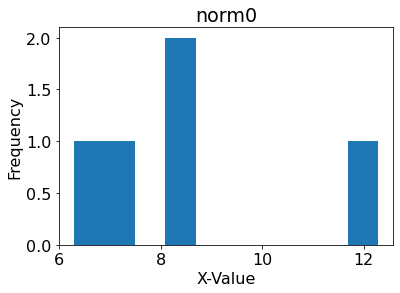

In [3]:
fig = plt.figure()
plt.hist(norm0)
plt.xlabel('X-Value')
plt.ylabel('Frequency')
plt.title('norm0')
plt.show()

sf.best_save(fig, 'normN5')

## Sampling from a Normal Distribution (N=1000)

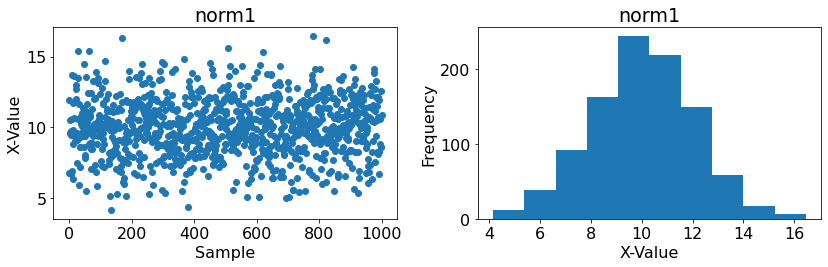

In [4]:
norm1 = np.random.normal(loc=10, scale=2, size=(1000,))
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(range(0,1000), norm1)
plt.xlabel('Sample')
plt.ylabel('X-Value')
plt.title('norm1')
plt.subplot(1,2,2)
plt.hist(norm1)
plt.xlabel('X-Value')
plt.ylabel('Frequency')
plt.title('norm1')

plt.tight_layout()
plt.show()

sf.best_save(fig, 'norm10000')

## Summary of Sampled Data

In [5]:
print(f'Min = {np.min(norm1):.2f}')
print(f'1st Qu = {np.quantile(norm1, 0.25):.2f}')
print(f'Median = {np.median(norm1):.2f}')
print(f'Mean = {np.mean(norm1):.2f}')
print(f'3rd Qu. = {np.quantile(norm1, 0.75):.2f}')
print(f'Max = {np.max(norm1):.2f}')

Min = 4.16
1st Qu = 8.71
Median = 10.02
Mean = 10.02
3rd Qu. = 11.34
Max = 16.45


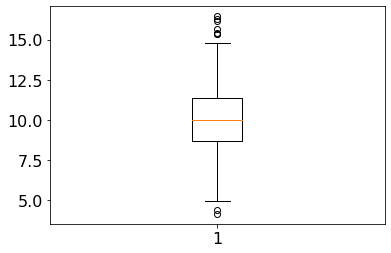

In [6]:
fig = plt.figure()
plt.boxplot(norm1)
plt.show()

sf.best_save(fig, 'boxplot')

In [7]:
FIT = stats.norm.fit(norm1) 
print(FIT) # apprently we don't get confidence intervals

(10.016035742935667, 2.0249551153455223)


## Fit the Data

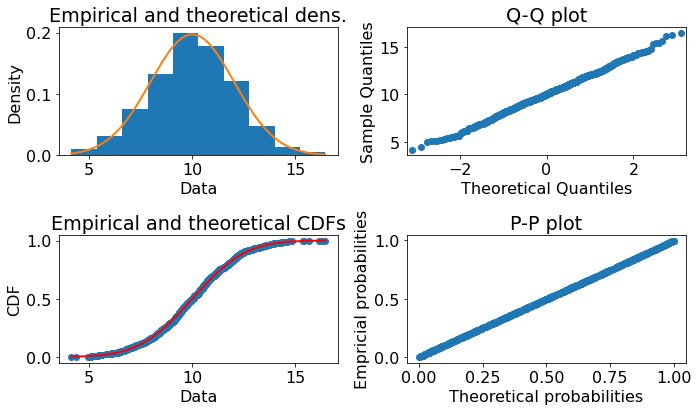

In [8]:
fig = plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.hist(norm1, density=True)
x = np.linspace(np.min(norm1), np.max(norm1), 500)
y = stats.norm.pdf(x, loc=FIT[0], scale=FIT[1])
plt.plot(x,y, lw=2)
plt.xlabel('Data')
plt.ylabel('Density')
plt.title('Empirical and theoretical dens.')

ax = plt.subplot(2,2,2)
sm.qqplot(norm1, ax=ax)
plt.title('Q-Q plot')

plt.subplot(2,2,3)
x = np.sort(norm1)
y = 1 * np.arange(len(norm1)) / (len(norm1) - 1)
plt.scatter(x,y)
y = stats.norm.cdf(x, loc=FIT[0], scale=FIT[1])
plt.plot(x,y,lw=2, c='r')
plt.xlabel('Data') 
plt.ylabel('CDF')
plt.title('Empirical and theoretical CDFs')

plt.subplot(2,2,4)
theoretical_prob = stats.norm.cdf(norm1, loc=10, scale=2)
empirical_prob = stats.norm.cdf(norm1, loc=FIT[0], scale=FIT[1])
plt.scatter(theoretical_prob, empirical_prob)
plt.xlabel('Theoretical probabilities')
plt.ylabel('Empricial probabilities')
plt.title('P-P plot')

plt.tight_layout()
plt.show()

sf.best_save(fig, 'fitdata')

## Testing Normality - Shapiro-Wilk Test (Univariate)

In [9]:
stats.shapiro(norm1)

ShapiroResult(statistic=0.9984793663024902, pvalue=0.5412535667419434)

## Testing Normality - Beta Distribution

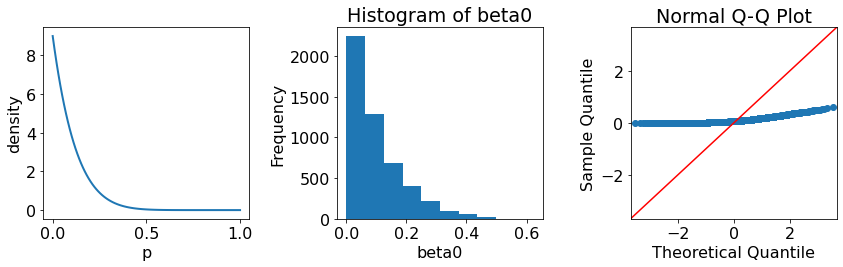

In [10]:
beta0 = np.random.beta(a=1, b=9, size=(5000,))
p = np.linspace(0, 1, num=(100))

fig = plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(p, stats.beta.pdf(p, 1, 9), lw=2)
plt.xlabel('p')
plt.ylabel('density')
plt.subplot(1,3,2)
plt.hist(beta0)
plt.xlabel('beta0')
plt.ylabel('Frequency')
plt.title('Histogram of beta0')
ax = plt.subplot(1,3,3)
sm.qqplot(beta0,ax=ax)
sm.qqline(ax, line='45', x=beta0)
plt.xlabel('Theoretical Quantile')
plt.ylabel('Sample Quantile')
plt.title('Normal Q-Q Plot')

plt.tight_layout()
plt.show()

sf.best_save(fig, 'betanormal')

In [11]:
stats.shapiro(beta0)

ShapiroResult(statistic=0.8662368059158325, pvalue=0.0)

## Sample from a Bivariate Normal

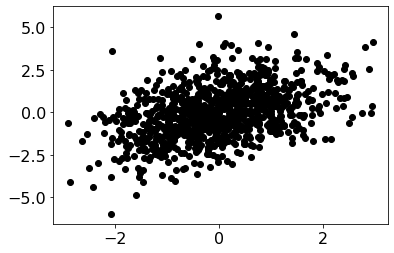

In [12]:
my_n1 = 1000
my_mu1 = np.array([0, 0])
my_Sigma1 = np.array([[1, 0.6], [0.6, 2]])
binorm = np.random.multivariate_normal(my_mu1, my_Sigma1, (my_n1,))

fig = plt.figure()
plt.scatter(binorm[:,0], binorm[:,1], c='k')
plt.show()

sf.best_save(fig, 'binorm')

## Confidence Ellipse

In [13]:
# found at https://gist.github.com/CarstenSchelp/b992645537660bda692f218b562d0712
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of `x` and `y`
    
    See how and why this works: https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html
    
    This function has made it into the matplotlib examples collection:
    https://matplotlib.org/devdocs/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py
    
    Or, once matplotlib 3.1 has been released:
    https://matplotlib.org/gallery/index.html#statistics
    
    I update this gist according to the version there, because thanks to the matplotlib community
    the code has improved quite a bit.
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data.
    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.
    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.
    Returns
    -------
    matplotlib.patches.Ellipse
    Other parameters
    ----------------
    kwargs : `~matplotlib.patches.Patch` properties
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)
    # render plot with "plt.show()".

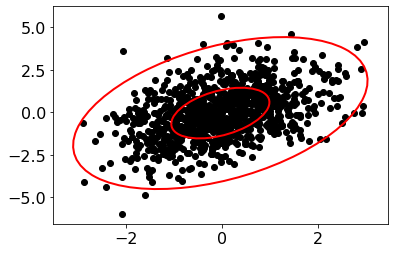

In [14]:
fig = plt.figure()
plt.scatter(binorm[:,0], binorm[:,1], c='k')
confidence_ellipse(binorm[:,0], binorm[:,1], plt.gca(), n_std=3, edgecolor='r', lw=2)
confidence_ellipse(binorm[:,0], binorm[:,1], plt.gca(), n_std=1, edgecolor='r', lw=2)
plt.show()

sf.best_save(fig, 'confidEllipse')